In [36]:
import pandas as pd
import igraph as ig
import random

In [37]:
graph_path = 'graphs/'
result_path= 'results/'

In [38]:
graph_name = 'dash'
k  = 200
skill_size = 20
epoches  = 100

In [39]:
from Auction import payment_determination_wo_network, winner_selection_wo_network
from utils.graph import read_graph_from_csv,add_edges
from NetworkedAuction import network_division,winner_selection,payment_determination,winner_selection_CRA,payment_determination_CRA

graph  = read_graph_from_csv(f'{graph_path}{graph_name}.csv')
n = graph.vcount()
nodes = random.sample(range(n),k)
add_edges(graph,n,nodes)

average_social_cost = 0
average_overall_payment = 0
average_social_cost_ = 0
average_overall_payment_ = 0
average_overall_payment_cra = 0
average_social_cost_cra = 0

for _ in range(epoches):
    bids  = [random.uniform(0.5,1) for _ in range(n)]
    skills = [set(random.sample(range(skill_size), random.randint(1,skill_size/2))) for _ in range(n)]
    request  = set(random.sample(range(skill_size), random.randint(skill_size/2,skill_size)))
    division = network_division(graph,n)
    x,market_x = winner_selection(bids,skills,request,division)
    p = payment_determination(bids,skills,request,division,market_x)
    social_cost = sum([bids[i] for i in x])
    overall_payment = sum([p[i] for i in x])
    average_social_cost += social_cost
    average_overall_payment += overall_payment
    x_ = winner_selection_wo_network(bids,skills,request)
    p_ =payment_determination_wo_network(bids,skills,request,x_)
    social_cost_ = sum([bids[i] for i in x_])
    overall_payment_ = sum([p_[i] for i in x_])
    average_social_cost_ += social_cost_
    average_overall_payment_ += overall_payment_
    x_cra,market_x_cra = winner_selection_CRA(bids,skills,request,division)
    p_cra = payment_determination_CRA(bids,skills,request,division,market_x_cra)
    social_cost_cra = sum([bids[i] for i in x_cra])
    overall_payment_cra = sum([p_cra[i] for i in x_cra])
    average_social_cost_cra += social_cost_cra
    average_overall_payment_cra += overall_payment_cra


average_social_cost /= epoches
average_overall_payment /= epoches
average_social_cost_ /= epoches
average_overall_payment_ /= epoches
average_social_cost_cra /= epoches
average_overall_payment_cra /= epoches



In [40]:
df = pd.read_csv(f"{result_path}result.csv")
results = {
    "dataset": [graph_name],
    "k": [k],
    "skill": [skill_size],
    "cost_greedy": [average_social_cost],
    "cost_wo": [average_social_cost_],
    "cost_cra": [average_social_cost_cra],
    "payment_greedy": [average_overall_payment],
    "payment_wo": [average_overall_payment_],
    "payment_cra": [average_overall_payment_cra]
}

df_ = pd.DataFrame(results)
df =  pd.concat([df,df_],ignore_index=True)
df.to_csv(f"{result_path}result.csv", index=False)

In [46]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f"{result_path}result.csv")
df = df[df['skill'] == 20]
df

,dataset,k,skill,cost_greedy,cost_wo,cost_cra,payment_greedy,payment_wo,payment_cra
0,dash,25,20,2.337640,1.243187,2.350610,2.912036,1.281272,4.073013
1,dash,50,20,1.952807,1.206674,1.999502,2.279561,1.239868,3.178601
2,dash,75,20,1.836775,1.188693,1.884089,2.096043,1.227561,2.887665
3,dash,100,20,1.719700,1.229123,1.796919,1.953639,1.267438,2.817409
4,dash,125,20,1.685207,1.220537,1.710610,1.881179,1.251181,2.552526
5,dash,150,20,1.666167,1.196935,1.698635,1.823164,1.233325,2.443449
6,dash,175,20,1.602353,1.229738,1.632440,1.756652,1.261544,2.350285
7,dash,200,20,1.592908,1.232624,1.673651,1.741376,1.265653,2.464981


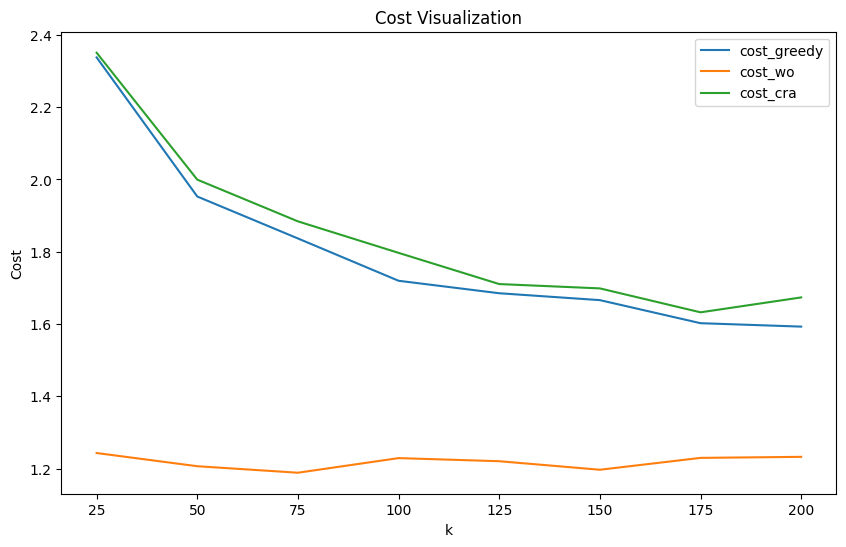

In [47]:

# 创建一个图形
plt.figure(figsize=(10, 6))

# 为每个 skill 值绘制不同的曲线
plt.plot(df['k'], df['cost_greedy'], label=f'cost_greedy')
plt.plot(df['k'], df['cost_wo'], label=f'cost_wo')
plt.plot(df['k'], df['cost_cra'], label=f'cost_cra')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Cost Visualization')
plt.xlabel('k')
plt.ylabel('Cost')

# 显示图形
plt.show()

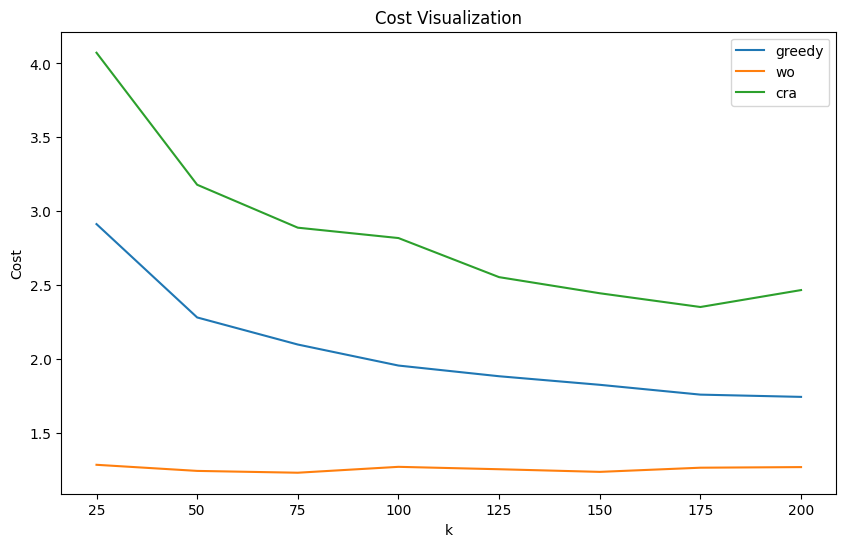

In [48]:
plt.figure(figsize=(10, 6))

# 为每个 skill 值绘制不同的曲线
plt.plot(df['k'], df['payment_greedy'], label='greedy')
plt.plot(df['k'], df['payment_wo'], label='wo')
plt.plot(df['k'], df['payment_cra'], label=f'cra')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Cost Visualization')
plt.xlabel('k')
plt.ylabel('Cost')

# 显示图形
plt.show()